# AI 221: Machine Exercise 2

### Problem 1: Palmer Penguin Species Data Set

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression

The dataset contains ~~345~~ 344 penguins from the Palmer Archipelago, Antarctica. It contains 4 numerical features of the penguins, namely: culmen length, culmen depth, flipper length, and body mass index

In [3]:
df1 = pd.read_csv("archive/penguins_size.csv")
df1.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df1.shape

(344, 7)

Classify the penguins into their species (Adelie, Chinstrap, and Gentoo) based only on the **culmen length** and **flipper length** features

### a.

**Visualize the 4 numerical features of the data using Seaborn’s pair plot, then set the 
hue to the penguin species**

In [5]:
df1.drop(columns=["island", "sex"], inplace=True)
df1.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0


Remove rows with empty values

In [6]:
df1.dropna(inplace=True)
df1.shape

(342, 5)

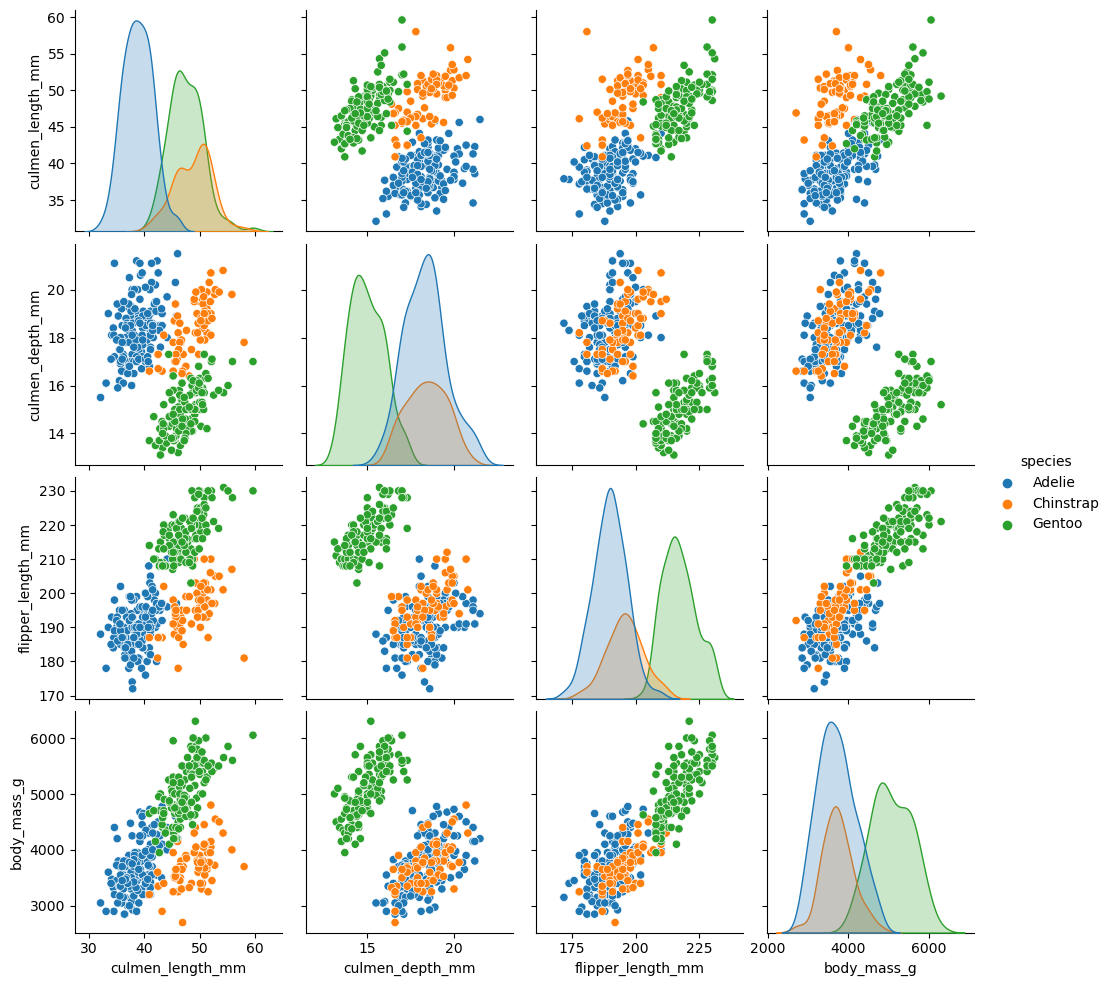

In [7]:
sns.pairplot(df1, hue="species")

### b.

**Split the samples (culmen length and flipper length features) into 75% Training and 25% Testing data at random with stratification (stratify=y).**

In [8]:
X1 = df1[["culmen_length_mm", "flipper_length_mm"]].to_numpy()
y1_raw = df1.iloc[:, 0].to_numpy()
label_ecoder = LabelEncoder()
y1 = label_ecoder.fit_transform(y1_raw)
print(dict(zip(label_ecoder.classes_, np.unique(y1))))

{'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}


In [9]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, stratify=y1, random_state=0)
print(X1_train.shape, y1_train.shape)
print(X1_test.shape, y1_test.shape)

(256, 2) (256,)
(86, 2) (86,)


**Build a pipeline with Standard scaler then SVC. Train the model using the default settings for multi-class SVC in sklearn**

In [10]:
model1 = make_pipeline(StandardScaler(),
                       SVC()).fit(X1_train, y1_train)

**Training Evaluation Metrics**

Accuracy: 0.953125
Macro-averaged F1-score: 0.9435486866559842


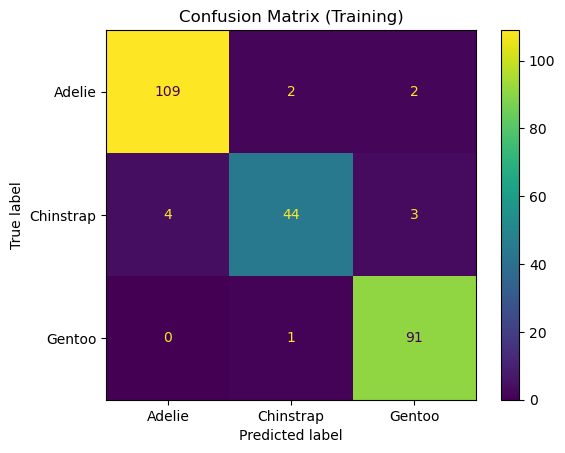

In [11]:
y1_train_pred = model1.predict(X1_train)
cfm1_train = confusion_matrix(y1_train, y1_train_pred)
cm1_display_train = ConfusionMatrixDisplay(confusion_matrix = cfm1_train, display_labels = label_ecoder.classes_)
cm1_display_train.plot()
plt.title("Confusion Matrix (Training)")
print(f"Accuracy: {accuracy_score(y1_train, y1_train_pred)}")
print(f"Macro-averaged F1-score: {f1_score(y1_train, y1_train_pred, average='macro')}")

**Testing Evaluation Metrics**

Accuracy: 0.9651162790697675
Macro-averaged F1-score: 0.9567099567099567


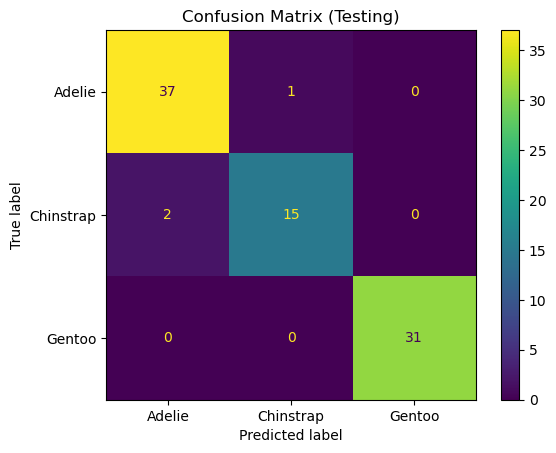

In [12]:
y1_test_pred = model1.predict(X1_test)
cfm1_test = confusion_matrix(y1_test, y1_test_pred)
cm1_display_test = ConfusionMatrixDisplay(confusion_matrix = cfm1_test, display_labels = label_ecoder.classes_)
cm1_display_test.plot()
plt.title("Confusion Matrix (Testing)")
print(f"Accuracy: {accuracy_score(y1_test, y1_test_pred)}")
print(f"Macro-averaged F1-score: {f1_score(y1_test, y1_test_pred, average='macro')}")

### c.

**Visualize the decision boundary in the space of culmen length vs. flipper length. Add a scatter plot of the training and test data set**

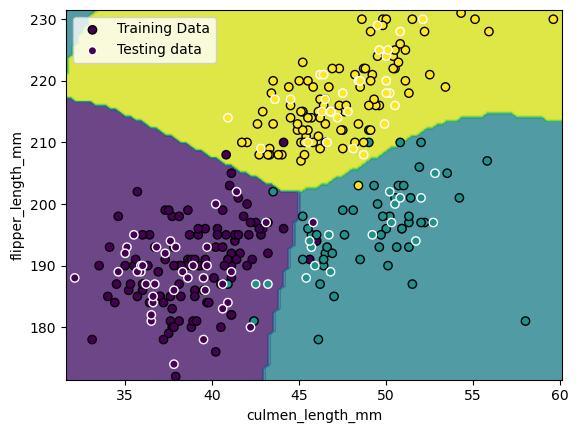

In [13]:
DecisionBoundaryDisplay.from_estimator(model1, X1, alpha=0.8, eps=0.5)
plt.scatter(X1_train[:, 0], X1_train[:, 1], c=y1_train, edgecolors="k", label="Training Data")
plt.scatter(X1_test[:, 0], X1_test[:, 1], c=y1_test, edgecolors="w", label="Testing data")
plt.xlabel("culmen_length_mm")
plt.ylabel("flipper_length_mm")
plt.legend()
plt.show()

In [14]:
def print_metrics(model):
    test_pred = model.predict(X1_test)
    print(f"Accuracy: {accuracy_score(y1_test, test_pred)}")
    print(f"Macro-averaged F1-score: {f1_score(y1_test, test_pred, average='macro')}")
    return test_pred

### d.

**Varying the box constraint, kernel function, kernel parameter, and multi-class strategy.**\
Note: SVC default values (C=1, kernel="rbf", gamma="scale" decision_function_shape="ovr")\
Test Accuracy = 0.9651162790697675\
Test Macro-averaged F1-score: 0.9567099567099567

In [15]:
model1_a = make_pipeline(StandardScaler(),
                       SVC(C=5, kernel="rbf", gamma="auto", decision_function_shape="ovr")).fit(X1_train, y1_train)
_ = print_metrics(model1_a)

Accuracy: 0.9651162790697675
Macro-averaged F1-score: 0.9567099567099567


In [16]:
model1_b = make_pipeline(StandardScaler(),
                       SVC(C=5, kernel="rbf", gamma=5, decision_function_shape="ovo")).fit(X1_train, y1_train)
_ = print_metrics(model1_b)

Accuracy: 0.9767441860465116
Macro-averaged F1-score: 0.9724724724724725


In [17]:
model1_c = make_pipeline(StandardScaler(),
                       SVC(C=1, kernel="linear", gamma=1, decision_function_shape="ovo")).fit(X1_train, y1_train)
_ = print_metrics(model1_c)

Accuracy: 0.9651162790697675
Macro-averaged F1-score: 0.9567099567099567


In [18]:
model1_d = make_pipeline(StandardScaler(),
                       SVC(C=100, kernel="poly", gamma=1, decision_function_shape="ovo")).fit(X1_train, y1_train)
_ = print_metrics(model1_d)

Accuracy: 0.9534883720930233
Macro-averaged F1-score: 0.9423328198641604


In [19]:
model1_e = make_pipeline(StandardScaler(),
                       SVC(C=1, kernel="sigmoid", gamma=1.5, decision_function_shape="ovo")).fit(X1_train, y1_train)
_ = print_metrics(model1_e)

Accuracy: 0.9534883720930233
Macro-averaged F1-score: 0.9400553150553151


**Best SVC model: model1_b (C=5, kernel="rbf", gamma=5, decision_function_shape="ovo")**

**Training Evaluation Metrics**

Accuracy: 0.95703125
Macro-averaged F1-score: 0.9489849036959916


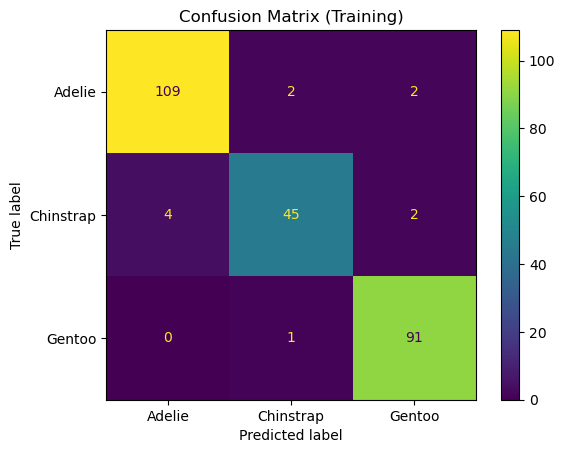

In [20]:
y1_b_train_pred = model1_a.predict(X1_train)
cfm1_b_train = confusion_matrix(y1_train, y1_b_train_pred)
cm1_b_display_train = ConfusionMatrixDisplay(confusion_matrix = cfm1_b_train, display_labels = label_ecoder.classes_)
cm1_b_display_train.plot()
plt.title("Confusion Matrix (Training)")
print(f"Accuracy: {accuracy_score(y1_train, y1_b_train_pred)}")
print(f"Macro-averaged F1-score: {f1_score(y1_train, y1_b_train_pred, average='macro')}")

**Testing Evaluation Metrics**

Accuracy: 0.9767441860465116
Macro-averaged F1-score: 0.9724724724724725


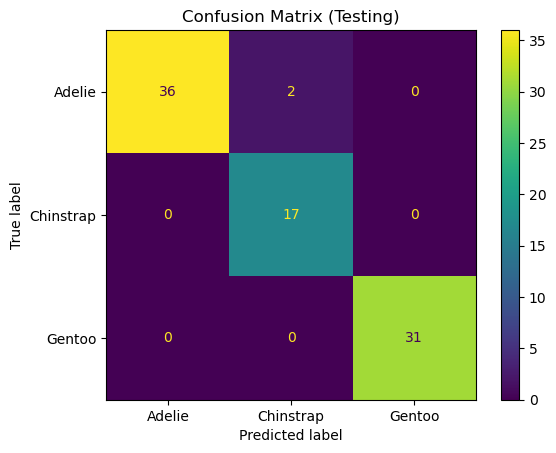

In [21]:
y1_b_test_pred = model1_b.predict(X1_test)
cfm1_b_test = confusion_matrix(y1_test, y1_b_test_pred)
cm1_b_display_test = ConfusionMatrixDisplay(confusion_matrix = cfm1_b_test, display_labels = label_ecoder.classes_)
cm1_b_display_test.plot()
plt.title("Confusion Matrix (Testing)")
print(f"Accuracy: {accuracy_score(y1_test, y1_b_test_pred)}")
print(f"Macro-averaged F1-score: {f1_score(y1_test, y1_b_test_pred, average='macro')}")

**Visualize the decision boundary in the space of culmen length vs. flipper length. Add a scatter plot of the training and test data set**

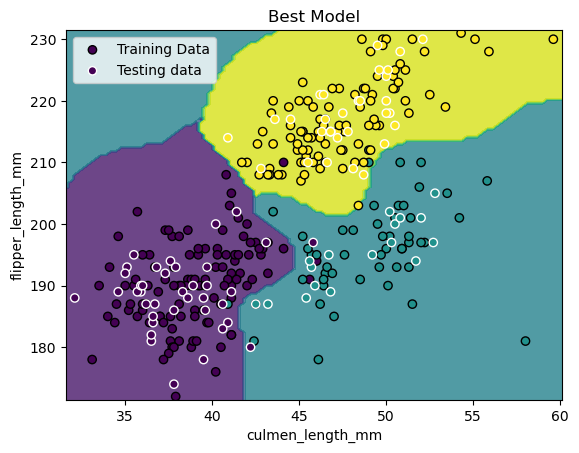

In [22]:
DecisionBoundaryDisplay.from_estimator(model1_b, X1, alpha=0.8, eps=0.5)
plt.scatter(X1_train[:, 0], X1_train[:, 1], c=y1_train, edgecolors="k", label="Training Data")
plt.scatter(X1_test[:, 0], X1_test[:, 1], c=y1_test, edgecolors="w", label="Testing data")
plt.xlabel("culmen_length_mm")
plt.ylabel("flipper_length_mm")
plt.title("Best Model")
plt.legend()
plt.show()

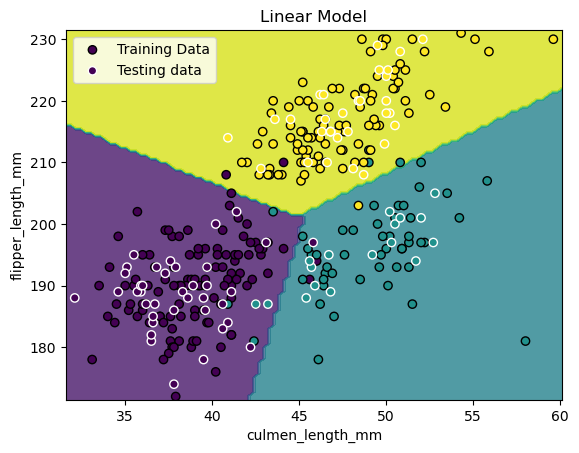

In [23]:
DecisionBoundaryDisplay.from_estimator(model1_c, X1, alpha=0.8, eps=0.5)
plt.scatter(X1_train[:, 0], X1_train[:, 1], c=y1_train, edgecolors="k", label="Training Data")
plt.scatter(X1_test[:, 0], X1_test[:, 1], c=y1_test, edgecolors="w", label="Testing data")
plt.xlabel("culmen_length_mm")
plt.ylabel("flipper_length_mm")
plt.title("Linear Model")
plt.legend()
plt.show()

**Note:** Although the best model has better theoretical evaluation metrics than the other models tested, the linear model is still likely the preferred one because of its simplier decision boundary that can probably generalize better on new data

### Problem 2: Predicting Bike Sharing Demand in Seoul, South Korea

The dataset contains 8760 instances of weather characteristics, holiday, season, and the number of bikes rented for that hour

In [24]:
df2 = pd.read_csv("seoul+bike+sharing+demand/SeoulBikeData.csv", encoding="latin1")
print(df2.shape)
df2.head()

(8760, 14)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Take only the weather data + hour of the day as inputs: Hour, Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall and Rainfall. We’ll also take only the Winter data to keep the number of data points manageable for kernel methods. Goal is to predict the bike demand (Rented Bike Count).

In [25]:
df2 = df2[df2["Seasons"] == "Winter"]
df2.drop(columns=["Date", "Hour", "Seasons", "Holiday", "Functioning Day"], inplace=True)
print(df2.shape)
df2.head()

(2160, 9)


,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


No missing values

In [26]:
df2.isna().sum()

Rented Bike Count            0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
dtype: int64

### a.

Visualize the weather data and the Rented Bike Count using box plots

<Axes: >

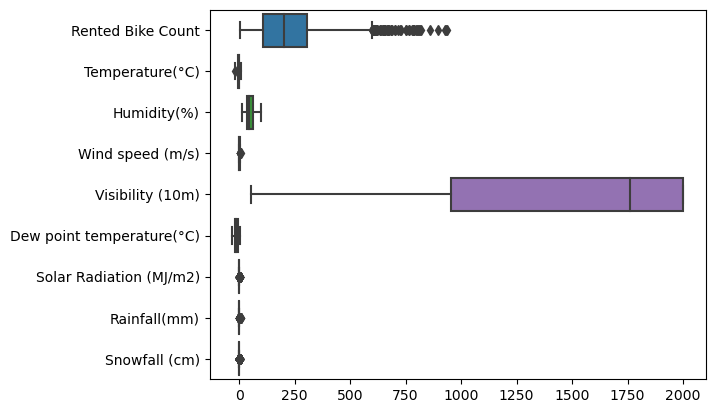

In [27]:
sns.boxplot(data=df2, orient="h")

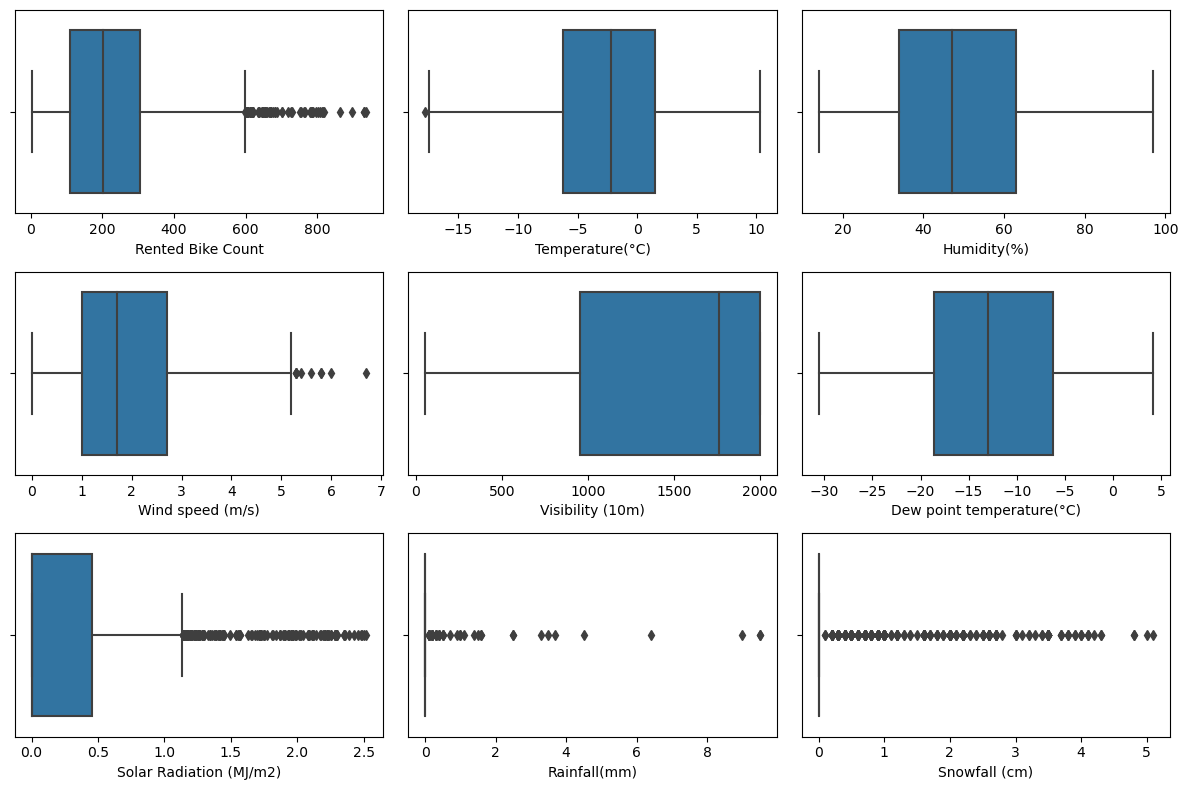

In [28]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
for i, feature in enumerate(df2.columns):
    row, col = divmod(i, 3)
    sns.boxplot(x=df2[feature], ax=axes[row, col])
plt.tight_layout()

### b.

**Split the data into 70% training and 30% testing at random**

In [29]:
X2 = df2.iloc[:, 1:].to_numpy()
y2 = df2.iloc[:, 0].to_numpy()
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)
print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)

(1512, 8) (1512,)
(648, 8) (648,)


**Make a pipeline using Standard Scaler and SVR. Train the model using the training set. Report RMSE (root mean squared error) on the Test Set. Fine-tune SVR by changing the kernel function, kernel parameter, and epsilon.**

In [51]:
svr = make_pipeline(StandardScaler(),
                       SVR(kernel="poly", gamma=0.5, epsilon=0.001)).fit(X2_train, y2_train)
y2_svr_test_pred = svr.predict(X2_test)
svr_rmse = np.sqrt(mean_squared_error(y2_test, y2_svr_test_pred))
print(f"RMSE: {svr_rmse}")

RMSE: 133.37347540876536


### c.

**Using Standard Scaler + KRR. Fine-tune KRR by changing the kernel function, kernel parameter, and regularization (alpha)**

In [32]:
krr = make_pipeline(StandardScaler(),
                    KernelRidge(kernel="rbf", gamma=0.3, alpha=0.1)).fit(X2_train, y2_train)
y2_krr_test_pred = krr.predict(X2_test)
krr_rmse = np.sqrt(mean_squared_error(y2_test, y2_krr_test_pred))
print(f"RMSE: {krr_rmse}")

RMSE: 121.7628086492088


### d.

**Using simple Linear Regression**

In [33]:
lr = make_pipeline(StandardScaler(),
                    LinearRegression()).fit(X2_train, y2_train)
y2_lr_test_pred = lr.predict(X2_test)
lr_rmse = np.sqrt(mean_squared_error(y2_test, y2_lr_test_pred))
print(f"RMSE: {lr_rmse}")

RMSE: 127.62074076308345


**Compare the results of your SVR, KRR, and Linear Regression**

| Model | RMSE Value |
|-------|------------|
| SVR | 133.37347540876536 |
| KRR | 121.7628086492088 |
| Linear Regression | 127.62074076308345 |

Kernel Ridge Regression with radial basis function (rbf) as its kernel is the best model because of its lower root mean squared error (RMSE) on the test data. SVM Regression with polynomial kernel function on the other hand has the highest RMSE out of the three. Because Linear Regression is not very far in error with KRR, it would probably be fine to be used when computational resources are limited.